In [6]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list


['DejaVu Serif Display',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'cmex10',
 'STIXSizeFourSym',
 'cmb10',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'STIXSizeTwoSym',
 'cmr10',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Sans',
 'cmmi10',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'cmtt10',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'cmss10',
 'cmsy10',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXGeneral',
 'STIXSizeFiveSym',
 'STIXGeneral',
 'Noto Sans Armenian',
 'PT Mono',
 'Microsoft Sans Serif',
 'Arial Unicode MS',
 'Gill Sans',
 'Impact',
 'STIXGeneral',
 'STIXIntegralsSm',
 'Hoefler Text',
 'Noto Sans Lepcha',
 'Hiragino Sans',
 'Plantagenet Cherokee',
 'System Font',
 'Courier New',
 'Herculanum',
 'Thonburi',
 'Verdana',
 'Noto Sans Old Italic',
 'Gurmukhi MN',
 'Tami

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

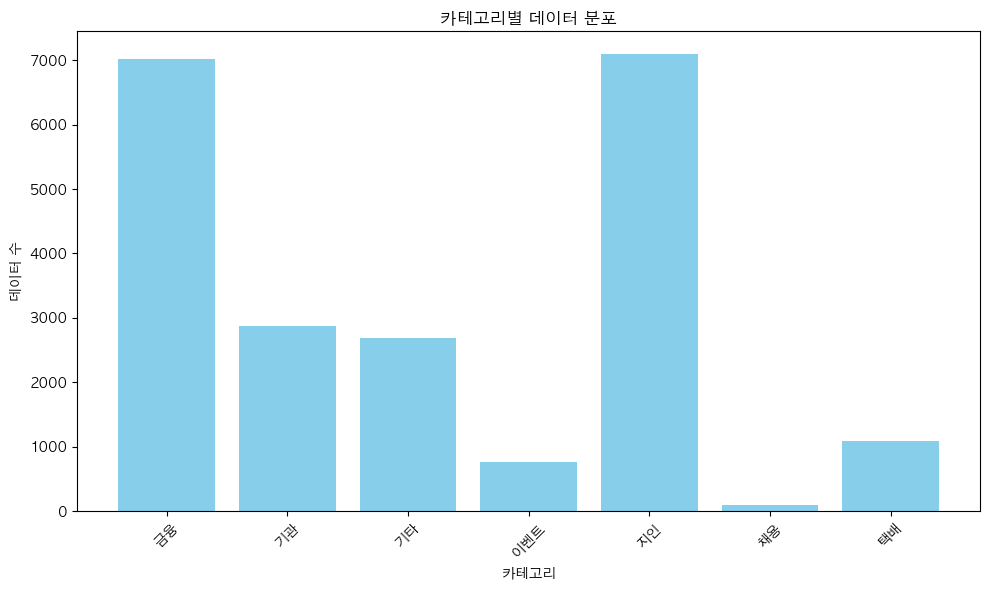

In [17]:
import pandas as pd


# 파일 경로
files = [
    '/Users/choiminkwan/Downloads/금융_categorized-2.csv',
    '/Users/choiminkwan/Downloads/기관_categorized-2.csv',
    '/Users/choiminkwan/Downloads/기타_categorized.csv',
    '/Users/choiminkwan/Downloads/이벤트_categorized-2.csv',
    '/Users/choiminkwan/Downloads/지인_categorized-2.csv',
    '/Users/choiminkwan/Downloads/채용_categorized-2.csv',
    '/Users/choiminkwan/Downloads/택배_categorized-2.csv'
]

# 각 카테고리 이름
categories = ["금융", "기관", "기타", "이벤트", "지인", "채용", "택배"]


# 각 파일에서 데이터를 읽어옴, 전처리 적용
dataframes = [pd.read_csv(file).applymap(lambda x: x.strip().lower() if isinstance(x, str) else x) for file in files]


# 각 카테고리별 데이터의 크기 (데이터 포인트 수)
data_sizes = [len(df) for df in dataframes]

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(categories, data_sizes, color='skyblue')
plt.title('카테고리별 데이터 분포')
plt.xlabel('카테고리')
plt.ylabel('데이터 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


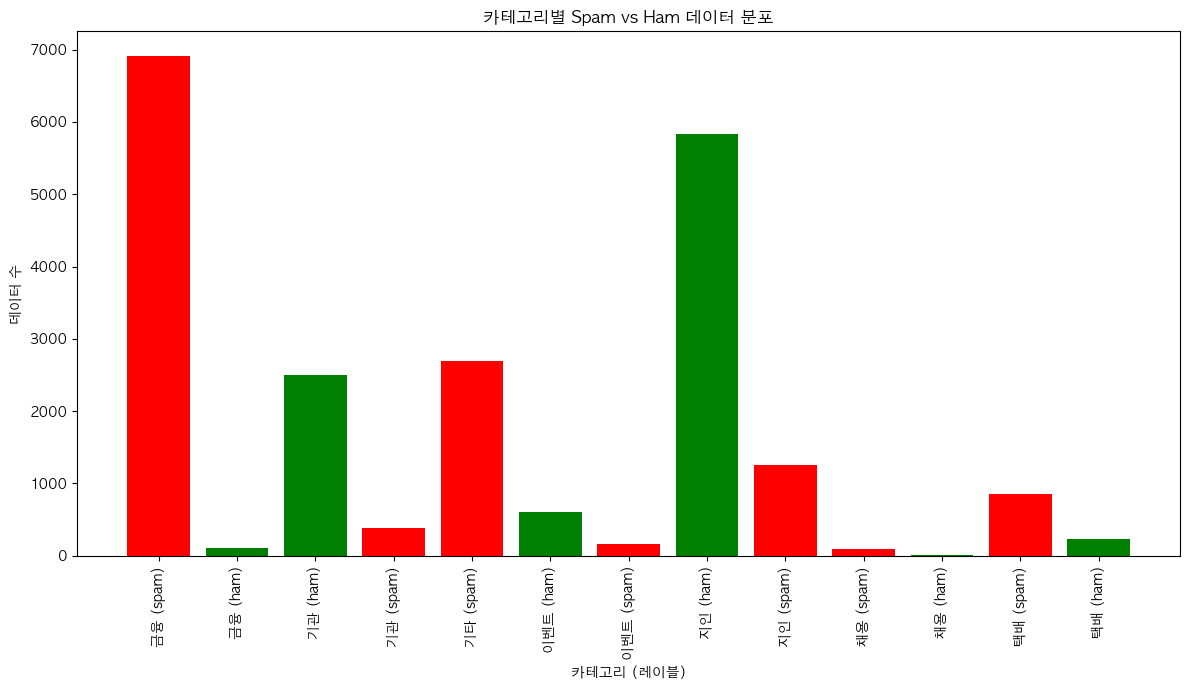

In [18]:


# 각 카테고리별 'spam'과 'ham'의 수를 계산
spam_ham_counts = [df['v1'].value_counts() for df in dataframes]

# 시각화를 위한 데이터 준비
category_names = []
counts = []
colors = []

for i, counts_dict in enumerate(spam_ham_counts):
    for label, count in counts_dict.items():
        category_names.append(f"{categories[i]} ({label})")
        counts.append(count)
        colors.append('red' if label == 'spam' else 'green')

# 시각화
plt.figure(figsize=(12, 7))
plt.bar(category_names, counts, color=colors)
plt.title('카테고리별 Spam vs Ham 데이터 분포')
plt.xlabel('카테고리 (레이블)')
plt.ylabel('데이터 수')
plt.xticks(rotation=90)  # 텍스트가 겹치지 않도록 회전
plt.tight_layout()
plt.show()


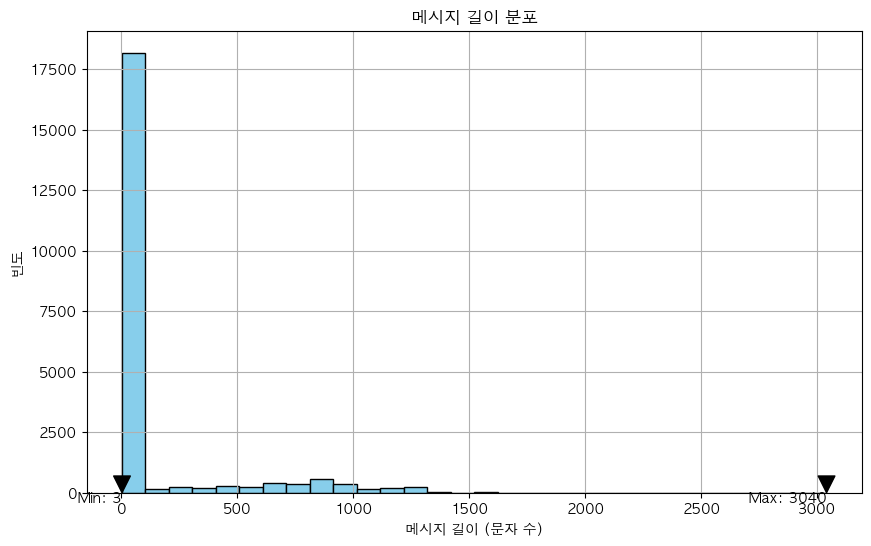

In [30]:
# 'v2' 컬럼을 이용해 모든 데이터프레임에서 각 메시지의 길이를 계산
all_message_lengths = []
for df in dataframes:
    if 'v2' in df.columns:  # 'v2' 컬럼이 있는지 확인
        all_message_lengths.extend(df['v2'].apply(len))

# 최소값과 최대값을 계산
min_length = min(all_message_lengths)
max_length = max(all_message_lengths)

# 시각화: 메시지 길이 분포 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(all_message_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('메시지 길이 분포')
plt.xlabel('메시지 길이 (문자 수)')
plt.ylabel('빈도')
plt.grid(True)

# 최소값과 최대값 표시
plt.annotate(f'Min: {min_length}', xy=(min_length, 0), xytext=(min_length, 50),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='right', verticalalignment='top')
plt.annotate(f'Max: {max_length}', xy=(max_length, 0), xytext=(max_length, 50),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='right', verticalalignment='top')

plt.show()

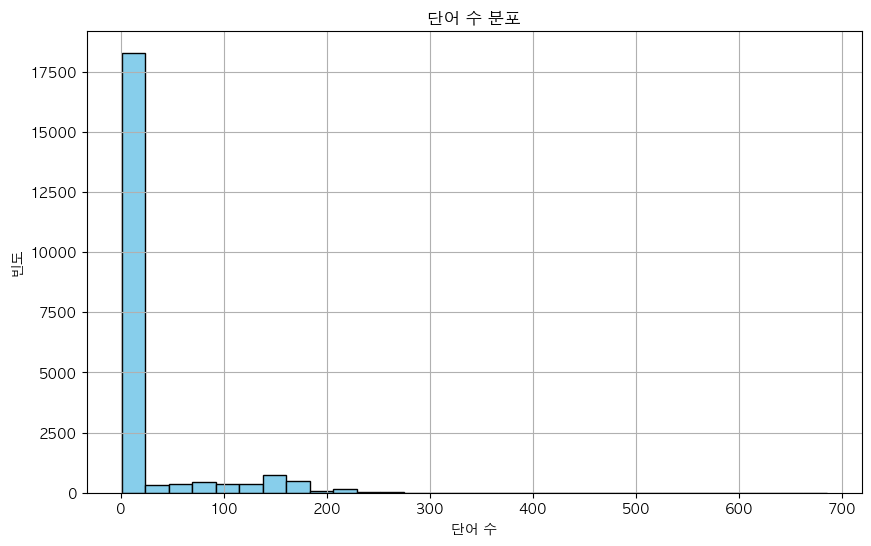

In [31]:
word_counts = [df['v2'].apply(lambda x: len(x.split())) for df in dataframes]
all_word_counts = [count for sublist in word_counts for count in sublist]

plt.figure(figsize=(10, 6))
plt.hist(all_word_counts, bins=30, color='skyblue', edgecolor='black')
plt.title('단어 수 분포')
plt.xlabel('단어 수')
plt.ylabel('빈도')
plt.grid(True)
plt.show()


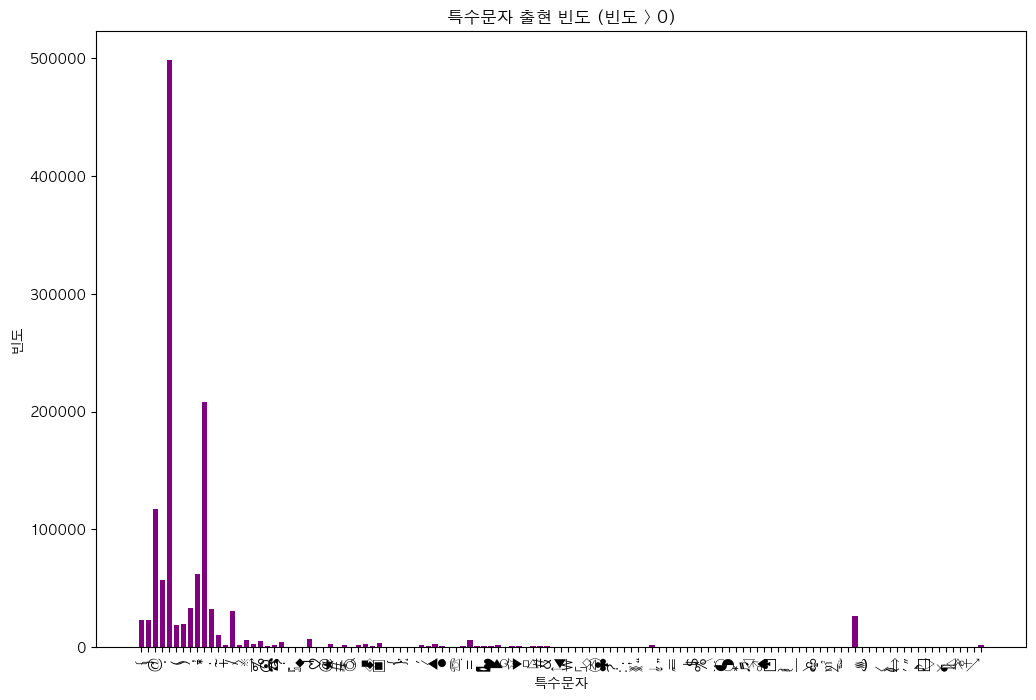

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re


# 특수문자 출현 빈도 계산
special_char_counter = Counter()

for df in dataframes:
    for text in df['v2']:
        # 특수문자만 추출
        special_chars = re.findall(r'\W', text)
        special_char_counter.update(special_chars)

# 빈도가 0보다 큰 특수문자만 포함
filtered_chars = {char: freq for char, freq in special_char_counter.items() if freq > 0}
special_chars, frequencies = zip(*filtered_chars.items())

# 특수문자 빈도 시각화
plt.figure(figsize=(12, 8))
plt.bar(special_chars, frequencies, color='purple')
plt.title('특수문자 출현 빈도 (빈도 > 0)')
plt.xlabel('특수문자')
plt.ylabel('빈도')
plt.xticks(rotation=90)  # 특수문자 이름이 겹치지 않게 회전
plt.show()

/var/folders/xv/70rfj3611wngztknbgd1z_kr0000gn/T/ipykernel_35053/3105183692.py:47: UserWarning: Glyph 65509 (\N{FULLWIDTH YEN SIGN}) missing from current font.
  plt.tight_layout()
/var/folders/xv/70rfj3611wngztknbgd1z_kr0000gn/T/ipykernel_35053/3105183692.py:47: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.tight_layout()


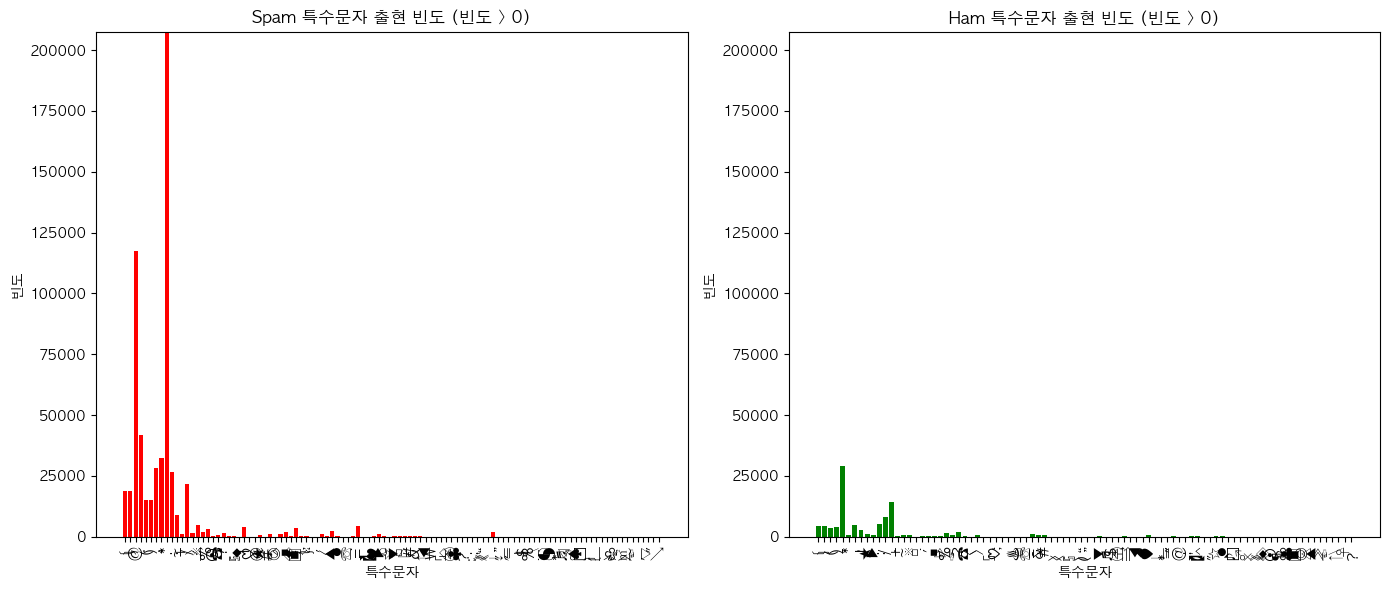

Top 10 Special Characters in Spam:
*: 207465
@: 117388
.: 42024
-: 32287
,: 28488
:: 26577
/: 21866
]: 18761
[: 18751
): 15159

Top 10 Special Characters in Ham:
-: 29284
.: 14449
/: 8345
:: 5379
,: 4926
[: 4386
]: 4383
): 4161
(: 3490
!: 2785


In [49]:
# 특수문자 출현 빈도 계산을 위한 함수
def calculate_special_char_frequencies(texts):
    counter = Counter()
    for text in texts:
        # 공백을 제외한 특수문자만 카운트
        special_chars = re.findall(r'[^\w\s]', text)
        counter.update(special_chars)
    return counter


# 'spam'과 'ham' 데이터 분리 및 특수문자 빈도 계산
spam_counter = Counter()
ham_counter = Counter()

for df in dataframes:
    spam_texts = df[df['v1'] == 'spam']['v2']
    ham_texts = df[df['v1'] == 'ham']['v2']
    spam_counter.update(calculate_special_char_frequencies(spam_texts))
    ham_counter.update(calculate_special_char_frequencies(ham_texts))

# 빈도가 0보다 큰 특수문자만 포함
spam_chars = {char: freq for char, freq in spam_counter.items() if freq > 0}
ham_chars = {char: freq for char, freq in ham_counter.items() if freq > 0}

# 최대 빈도값을 찾아 두 그래프의 y축 범위를 조정
max_frequency = max(max(spam_chars.values(), default=0), max(ham_chars.values(), default=0))

# 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(spam_chars.keys(), spam_chars.values(), color='red')
plt.title('Spam 특수문자 출현 빈도 (빈도 > 0)')
plt.xlabel('특수문자')
plt.ylabel('빈도')
plt.xticks(rotation=90)
plt.ylim(0, max_frequency)  # y축 범위 설정

plt.subplot(1, 2, 2)
plt.bar(ham_chars.keys(), ham_chars.values(), color='green')
plt.title('Ham 특수문자 출현 빈도 (빈도 > 0)')
plt.xlabel('특수문자')
plt.ylabel('빈도')
plt.xticks(rotation=90)
plt.ylim(0, max_frequency)  # y축 범위 설정

plt.tight_layout()
plt.show()

# 각 카테고리에서 가장 많이 사용된 상위 10개 특수문자 추출 및 출력
top_10_spam_chars = spam_counter.most_common(10)
top_10_ham_chars = ham_counter.most_common(10)

print("Top 10 Special Characters in Spam:")
for char, freq in top_10_spam_chars:
    print(f"{char}: {freq}")

print("\nTop 10 Special Characters in Ham:")
for char, freq in top_10_ham_chars:
    print(f"{char}: {freq}")

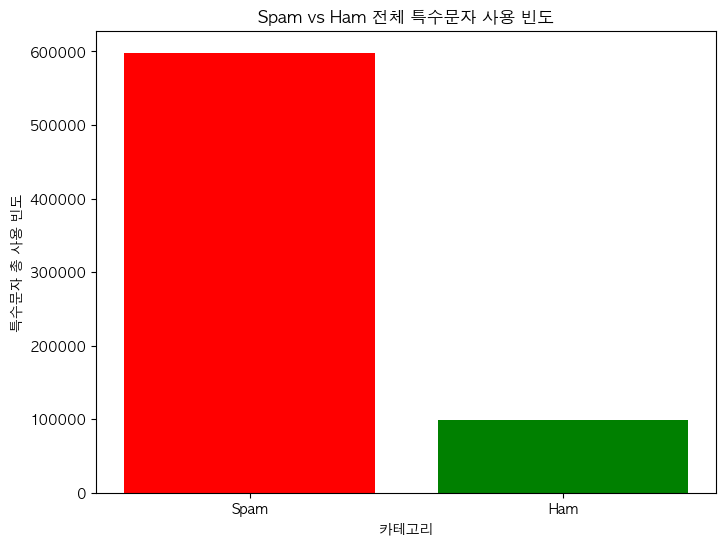

In [50]:

# 특수문자 출현 빈도 계산을 위한 함수 (공백 제외)
def calculate_special_char_frequencies(texts):
    counter = Counter()
    for text in texts:
        # 공백을 제외한 특수문자만 카운트
        special_chars = re.findall(r'[^\w\s]', text)
        counter.update(special_chars)
    return counter

# 'spam'과 'ham' 데이터 분리 및 특수문자 총 빈도 계산
total_spam_frequency = 0
total_ham_frequency = 0

for df in dataframes:
    spam_texts = df[df['v1'] == 'spam']['v2']
    ham_texts = df[df['v1'] == 'ham']['v2']
    spam_frequencies = calculate_special_char_frequencies(spam_texts)
    ham_frequencies = calculate_special_char_frequencies(ham_texts)
    total_spam_frequency += sum(spam_frequencies.values())
    total_ham_frequency += sum(ham_frequencies.values())

# 총 빈도 시각화
plt.figure(figsize=(8, 6))
categories = ['Spam', 'Ham']
frequencies = [total_spam_frequency, total_ham_frequency]  # 실제 출현 빈도
plt.bar(categories, frequencies, color=['red', 'green'])
plt.title('Spam vs Ham 전체 특수문자 사용 빈도')
plt.xlabel('카테고리')
plt.ylabel('특수문자 총 사용 빈도')
plt.show()

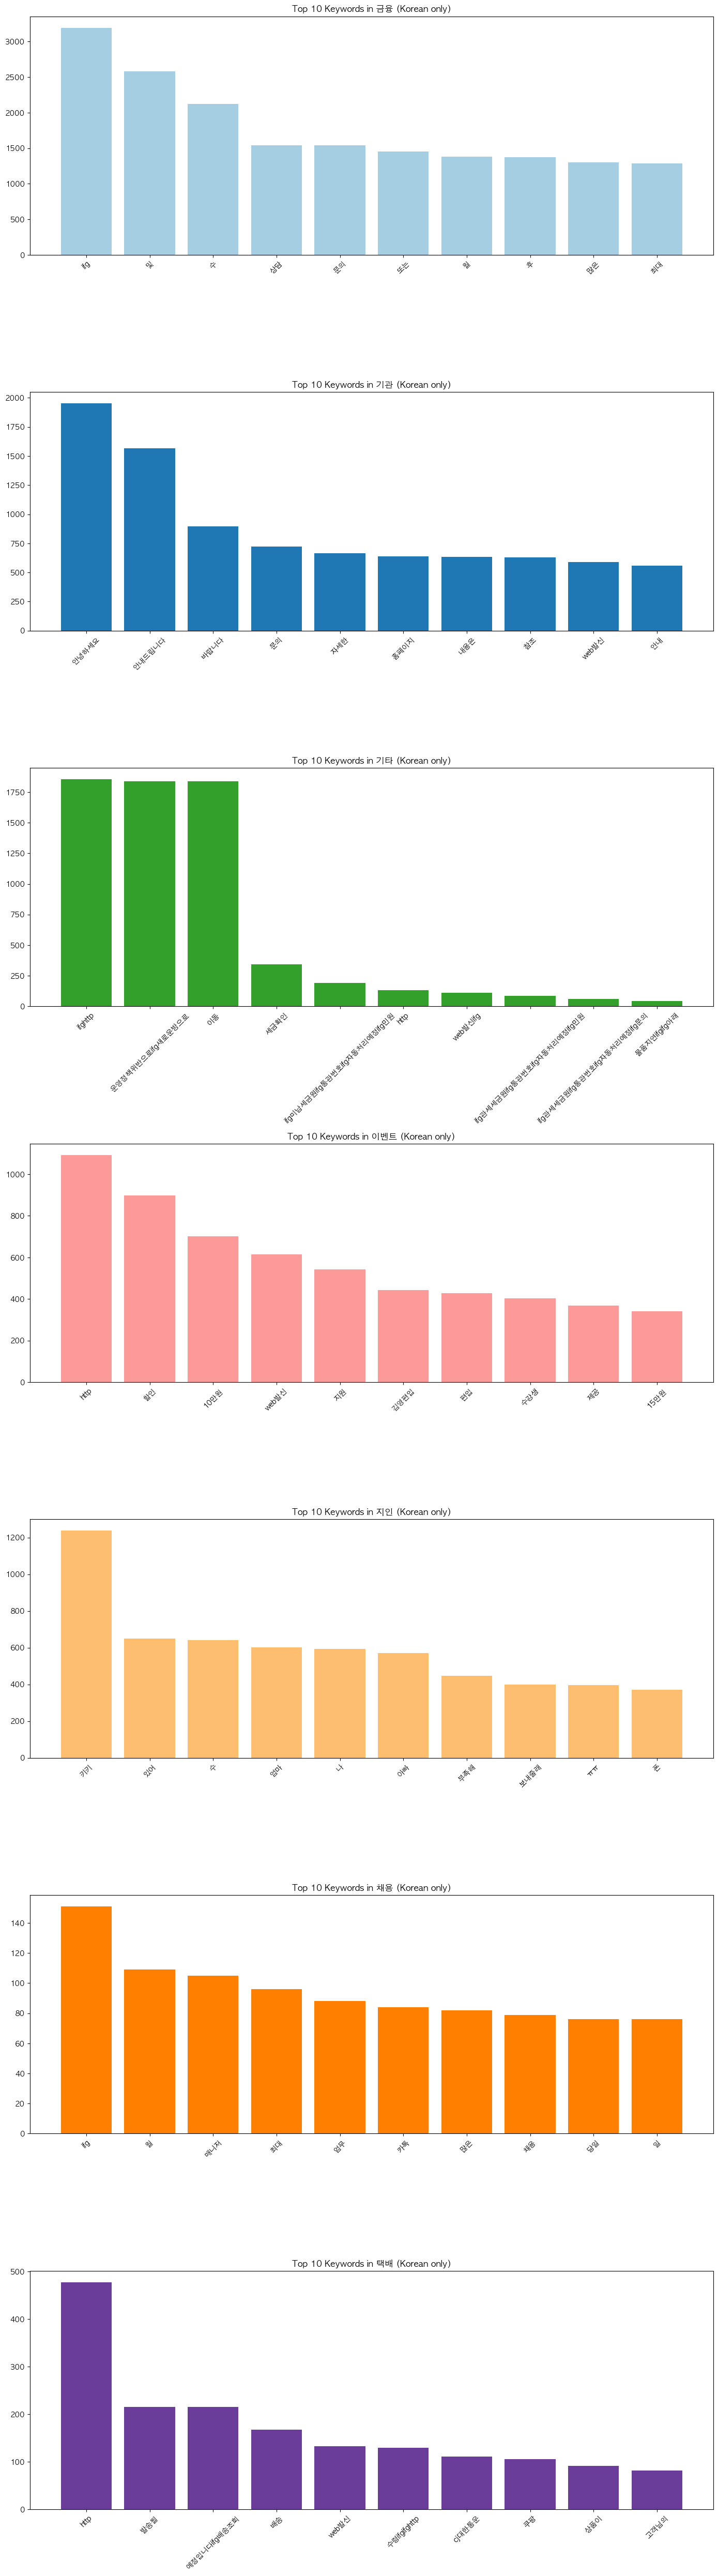

In [53]:
# 모든 데이터프레임을 하나로 결합
all_data = pd.concat(dataframes)

# URL 부분을 'http' 또는 'https'로 대체하는 텍스트 전처리 함수
def preprocess_text(text):
    # URL의 나머지 부분 제거하지만 'http'와 'https'는 남김
    text = re.sub(r'(http[s]?://\S+)', 'http', text)
    # 한글과 'http', 'https', 공백을 제외한 모든 문자 제거
    text = re.sub(r'[^\w\s가-힣]', '', text)
    return text

# 카테고리별 키워드 빈도 계산 함수
def get_top_keywords(data, category_label, top_n=10):
    # 해당 카테고리의 텍스트만 필터링 후 전처리
    texts = data[data['category'] == category_label]['v2'].apply(preprocess_text)
    
    # 빈 텍스트 제거
    texts = texts[texts.str.strip() != '']
    
    if texts.empty:
        return []  # 텍스트가 없으면 빈 리스트 반환
    
    # CountVectorizer로 텍스트 데이터 벡터화, 한국어 처리 설정
    vectorizer = CountVectorizer(stop_words='english', token_pattern=r'\b\w+\b', min_df=2)
    word_matrix = vectorizer.fit_transform(texts)
    
    # 빈도 계산
    sum_words = word_matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    
    # 가장 빈번한 단어 top_n 반환
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]

# 각 카테고리별 키워드 추출
categories = all_data['category'].unique()  # 모든 고유 카테고리

plt.figure(figsize=(14, 7 * len(categories)))
for i, category in enumerate(categories):
    keywords = get_top_keywords(all_data, category)
    
    # 키워드가 없으면 넘어감
    if not keywords:
        continue
    
    words, freqs = zip(*keywords)

    plt.subplot(len(categories), 1, i+1)
    plt.bar(words, freqs, color=plt.cm.Paired(i / len(categories)))
    plt.title(f'Top 10 Keywords in {category} (Korean only)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()